# Case-Study Title: Simple Linear Regression Analysis
###### Data Analysis methodology: CRISP-DM
###### Dataset: Toyota Used Cars certified features and dealing (sold) prices in Europe
###### Case Goal: Price Recommendation Intelligence System for Toyota Used Cars in Europe Trading Platform

# Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read Data from File

In [2]:
data = pd.read_csv('CS_01.csv')

In [3]:
data.shape  # 1325 records, 10 variables

(1325, 10)

# Business Understanding
 * know business process and issues
 * know the context of the problem
 * know the order of numbers in the business

# Data Understanding
## Data Inspection (Data Understanding from Free Perspective)
### Dataset variables definition

In [4]:
data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

* **Price**         : Sales (sold) price in Euro      -> what we want to predict
* **Age**           : Age of a used car in month 
* **KM**            : Kilometerage usage
* **FuelTyp**       : Petrol, Diesel, CNG             -> Categorical (factor)
* **HP**            : Horse power     
* **MetColor**      : 1 : if Metallic color, 0 : Not  -> Categorical (factor)
* **Automatic**     : 1 : if Automatic, 0 : Not       -> Categorical (factor)
* **CC**            : Engine displacement in cc
* **Doors**         : # of doors                      -> Categorical (factor)
* **Weight**        : Weight in Kilogram

## Data Exploring (Data Understanding from Statistical Perspective)
### Overview of Dataframe

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [7]:
data.tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1320,7500,69,20544,Petrol,86,1,0,1300,3,1025
1321,10845,72,19000,Petrol,86,0,0,1300,3,1015
1322,8500,71,17016,Petrol,86,0,0,1300,3,1015
1323,7250,70,16916,Petrol,86,1,0,1300,3,1015
1324,6950,76,1,Petrol,110,0,0,1600,5,1114


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1325 non-null   int64 
 1   Age        1325 non-null   int64 
 2   KM         1325 non-null   int64 
 3   FuelType   1325 non-null   object
 4   HP         1325 non-null   int64 
 5   MetColor   1325 non-null   int64 
 6   Automatic  1325 non-null   int64 
 7   CC         1325 non-null   int64 
 8   Doors      1325 non-null   int64 
 9   Weight     1325 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 103.6+ KB


In [10]:
# Do we have any NA in our Variables?
data.isna().sum()

# We have no MV problem in this dataset

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [11]:
# Check for abnormality in data
data.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1325.000000,1325.000000,1325.000000,1325,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1176,NaN,NaN,NaN,NaN,NaN,NaN
mean,9939.403019,59.189434,72338.591698,NaN,100.439245,0.664151,0.053585,1557.720000,4.002264,1064.744906
std,2357.685657,15.246154,36136.813322,NaN,12.931155,0.472465,0.225282,183.902799,0.952415,41.031192
min,4350.000000,13.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8250.000000,50.000000,47211.000000,NaN,86.000000,0.000000,0.000000,1400.000000,3.000000,1035.000000
50%,9500.000000,62.000000,66000.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1060.000000
75%,10995.000000,71.000000,89800.000000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1079.000000


### Categorical variables should be stored as factor

In [27]:
data.FuelType = data.FuelType.values.astype(str)
data.MetColor = data.MetColor.values.astype(bool)
data.Automatic = data.Automatic.values.astype(bool)
data.Doors = data.Doors.values.astype(str)

In [28]:
data.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1325.000000,1325.000000,1325.000000,1325,1325.000000,1325,1325,1325.000000,1325,1325.000000
unique,NaN,NaN,NaN,3,NaN,2,2,NaN,4,NaN
top,NaN,NaN,NaN,Petrol,NaN,True,False,NaN,5,NaN
freq,NaN,NaN,NaN,1176,NaN,880,1254,NaN,600,NaN
mean,9939.403019,59.189434,72338.591698,NaN,100.439245,NaN,NaN,1557.720000,NaN,1064.744906
std,2357.685657,15.246154,36136.813322,NaN,12.931155,NaN,NaN,183.902799,NaN,41.031192
min,4350.000000,13.000000,1.000000,NaN,69.000000,NaN,NaN,1300.000000,NaN,1000.000000
25%,8250.000000,50.000000,47211.000000,NaN,86.000000,NaN,NaN,1400.000000,NaN,1035.000000
50%,9500.000000,62.000000,66000.000000,NaN,110.000000,NaN,NaN,1600.000000,NaN,1060.000000
75%,10995.000000,71.000000,89800.000000,NaN,110.000000,NaN,NaN,1600.000000,NaN,1079.000000


### Univariate Profiling (check each variable individually)
#### Categorical variables
Check to sure that have good car distribution in each category

**Rule of Thumb**: we must have atleast 30 observation in each category

In [32]:
data.FuelType.value_counts()

# CNG cars sample size is very small -> 17/1325 < 0.05

Petrol    1176
Diesel     132
CNG         17
Name: FuelType, dtype: int64

> We have few data|sample in **CNG** category of **FuelType** -> it can affect on price prediction of this cars category

In [33]:
data.MetColor.value_counts()

True     880
False    445
Name: MetColor, dtype: int64

In [34]:
data.Automatic.value_counts()

False    1254
True       71
Name: Automatic, dtype: int64

> We have few data|sample in **True** category of **Automatic** -> it can affect on price prediction of this cars category

In [35]:
data.Doors.value_counts()

# 2-Doors cars sample size is very small -> 2/1325 < 0.05

5    600
3    593
4    130
2      2
Name: Doors, dtype: int64

In [37]:
data.loc[data.Doors == '2']  # abnormality (error in data recording process)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
650,8250,65,80000,Petrol,86,True,False,1300,2,1015
967,7950,71,139145,Diesel,73,False,False,2000,2,1115


#### Continuous variables
distribution: plot Histogram

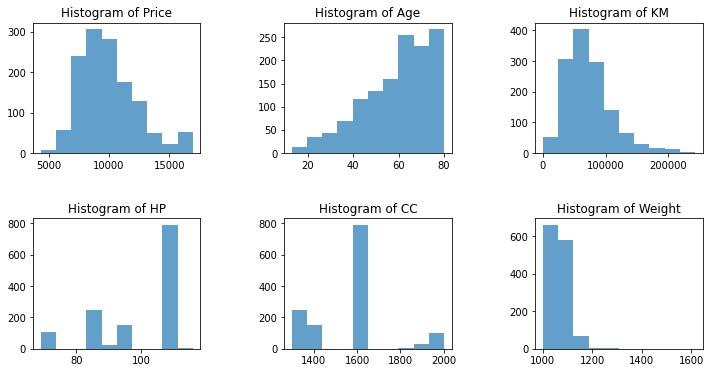

In [30]:
var_ind = [0, 1, 2, 4, 7, 9]
plot = plt.figure(figsize = (12, 6))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 7):
    a = plot.add_subplot(2, 3, i)
    a.hist(data.iloc[:, var_ind[i - 1]], alpha = 0.7)
    a.title.set_text('Histogram of ' + data.columns[var_ind[i - 1]])

Text(0.5, 1.0, 'Boxplot of Price')

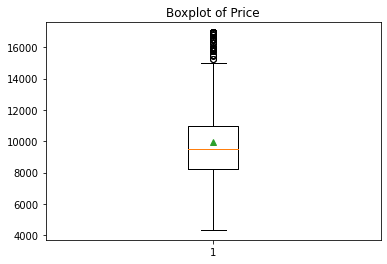

In [31]:
# Box plot of Price
plt.boxplot(data['Price'], showmeans = True)
plt.title('Boxplot of Price')

# Price is skewed to right a little bit

### Bivariate Profiling (measure 2-2 relationships between variables)
#### Two Continuous variables (Correlation Analysis)

In [38]:
data[['Price', 'KM']].corr(method = 'pearson')  # high correlation for this context (Used Car price)

,Price,KM
Price,1.000000,-0.519654
KM,-0.519654,1.000000


In [39]:
# correlation table between Price and continuous variables
corr_table = round(data[['Price','Age','KM','HP','CC','Weight']].corr(method = 'pearson'), 2)
corr_table   # choose continuous variables which have high corr with price and consider them as feature in regression model (which variable is important for price prediction)

,Price,Age,KM,HP,CC,Weight
Price,1.00,-0.84,-0.52,0.20,0.01,0.29
Age,-0.84,1.00,0.39,-0.05,-0.05,-0.27
KM,-0.52,0.39,1.00,-0.33,0.39,0.19
HP,0.20,-0.05,-0.33,1.00,-0.02,-0.08
CC,0.01,-0.05,0.39,-0.02,1.00,0.66
Weight,0.29,-0.27,0.19,-0.08,0.66,1.00


> **CC** has very small corr with **Price**, so it can not be good predictor in modeling

> **Price** has high correlation with **Age** and **KM**

> **Weight** and **CC** have high correlation with each other

<Axes: >

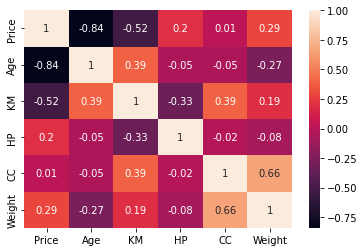

In [40]:
sns.heatmap(corr_table, annot = True)

Multicollinearity (having high correlation between predictor variables):

abs(corr) >= 0.30: Multicollinearity problem danger!

* **Weight** has 0.66 corr with **CC**
* **KM** has 0.39 corr with **Age**
* **KM** has 0.39 corr with **CC**
* **KM** has -0.33 corr with **HP**

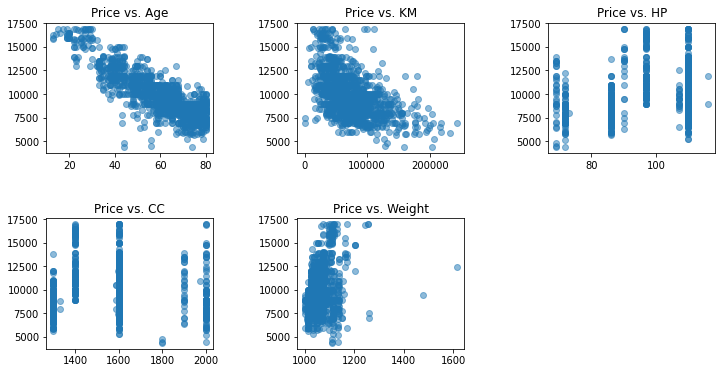

In [41]:
# Scatter Plot (between Price and other continuous variables 2 by 2)
var_ind = [1, 2, 4, 7, 9]
plot = plt.figure(figsize = (12, 6))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 6):
    a = plot.add_subplot(2, 3, i)
    a.scatter(x = data.iloc[:, var_ind[i - 1]],
             y = data.iloc[:, 0],
             alpha = 0.5)
    a.title.set_text('Price vs. ' + data.columns[var_ind[i - 1]])

> **Age** and **Price** have strong linear relationship

> **CC** and **HP** are categorical like!

# Data PreProcessing
## Divide Dataset into Train and Test randomly
* Learn model in Train dataset
* Evaluate model performance in Test dataset

In [42]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, random_state = 123)

# according to the dataset size: 70% - 30% 

In [43]:
# train data distribution must be similar to test data distribution
train.shape

(927, 10)

In [44]:
train.describe()

,Price,Age,KM,HP,CC,Weight
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,9904.320388,59.445523,72663.046386,100.035599,1553.957929,1064.050701
std,2373.385828,15.320373,36900.971280,13.008214,186.562184,40.789861
min,4400.000000,13.000000,1.000000,69.000000,1300.000000,1000.000000
25%,8250.000000,50.000000,47191.000000,86.000000,1400.000000,1035.000000
50%,9450.000000,62.000000,65950.000000,110.000000,1600.000000,1060.000000
75%,10950.000000,71.000000,90148.500000,110.000000,1600.000000,1075.000000
max,16950.000000,80.000000,243000.000000,116.000000,2000.000000,1615.000000


In [45]:
test.shape

(398, 10)

In [46]:
test.describe()

,Price,Age,KM,HP,CC,Weight
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,10021.115578,58.592965,71582.889447,101.379397,1566.482412,1066.361809
std,2321.607474,15.074129,34324.309251,12.716410,177.475108,41.594598
min,4350.000000,13.000000,1.000000,69.000000,1300.000000,1000.000000
25%,8250.000000,49.000000,47492.000000,90.000000,1400.000000,1040.000000
50%,9895.000000,62.000000,66751.500000,110.000000,1600.000000,1065.000000
75%,11450.000000,70.000000,87955.250000,110.000000,1600.000000,1080.000000
max,16950.000000,80.000000,218118.000000,116.000000,2000.000000,1480.000000


# Modeling
## Model 1: Simple Linear Regression (Univariate Regression)
based-on previous analysis, it seems that KM is important to explain Price variance (corr = -52%)

In [47]:
# Price vs. KM

# Define the features set X
X = train['KM']
X = sm.add_constant(X)  # adding a constant (a column of 1)

# Define response variable
y = train['Price']

In [48]:
X.head()

,const,KM
585,1.0,96000
876,1.0,44597
1123,1.0,83047
680,1.0,74889
689,1.0,73936


In [49]:
y.head()

585     12250
876      9950
1123     8950
680      7950
689      8995
Name: Price, dtype: int64

In [50]:
# Regress Price on KM
m1 = sm.OLS(y, X).fit()
m1.summary()  # results of m1 regression model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     353.8
Date:                Fri, 26 May 2023   Prob (F-statistic):           4.37e-67
Time:                        16:37:13   Log-Likelihood:                -8369.4
No. Observations:                 927   AIC:                         1.674e+04
Df Residuals:                     925   BIC:                         1.675e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.236e+04    146.561     84.351      0.000    1.21e+04    1.27e+04
KM            -0.0338      0.002    -18.810      0.000      -0.037      -0.030
==============================================================================
Omnibus:                       88.056   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.519
Skew:                           0.783   Prob(JB):                     2.24e-25
Kurtosis:                       3.698   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> **R-squared = 0.277**: 28% of **Price** variance has been explained by **KM**

> Consider the problem context, for price prediction, R-squared = 0.28 is not good model, we need 0.70

<Axes: xlabel='KM', ylabel='Price'>

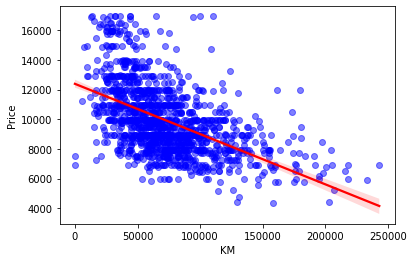

In [57]:
# Plot Regression Line with Confidence-Interval
sns.regplot(x = 'KM', 
            y = 'Price',
            data = data, 
            scatter_kws={'color':'blue', 'alpha':0.5},
            line_kws={'color':'red'})

# variance of 'Price' based-on 'KM' is high around regression line

**Main Question**: can we generalize this line to population? -> F-test and then t-test

Check Assumptions of Regression:

1. Normality of residuals (Errors)

In [58]:
m1.resid  # errors of model

585     3135.181435
876     -903.809990
1123    -603.025594
680    -1879.015168
689     -866.255676
           ...     
1238   -3148.887586
1147   -1541.429434
106     3698.387572
1041    -464.002002
1122   -1600.116168
Length: 927, dtype: float64

<Axes: ylabel='Probability'>

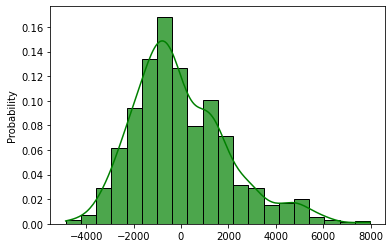

In [61]:
# Plot Histogram of residuals
sns.histplot(m1.resid, stat = 'probability', 
            kde = True,
            alpha = 0.7, color = 'green',
            bins = 20)

# skewed to right (have a tail along right)

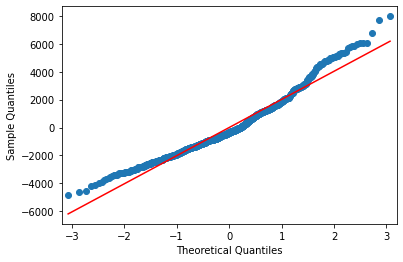

In [62]:
# QQ-plot
qqplot_m1 = sm.qqplot(m1.resid, line = 's')
plt.show()

# we have serious deviations from normal distribution

In [63]:
# Jarque-Bera Test (Normal Skewness = 0)
  # H0: the data is normally distributed
  # if p-value < 0.05, then reject normality assumption

# Omnibus K-squared normality test (Normal Kurtosis = 3)
  # H0: the data is normally distributed
  # if p-value < 0.05, then reject normality assumption

print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     353.8
Date:                Fri, 26 May 2023   Prob (F-statistic):           4.37e-67
Time:                        17:01:39   Log-Likelihood:                -8369.4
No. Observations:                 927   AIC:                         1.674e+04
Df Residuals:                     925   BIC:                         1.675e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.236e+04    146.561     84.351      0.0

In [64]:
# Shapiro-Wilk Test for Normality (instead of Skewness and Kurtosis Test)
  # H0: the data is normally distributed
  # if p-value < 0.05, then reject normality assumption

from scipy.stats import shapiro
shapiro_m1 = shapiro(m1.resid)
shapiro_m1

ShapiroResult(statistic=0.9627465605735779, pvalue=1.2403188149939445e-14)

> **result**: Residuals are not Normally Distributed -> reject first Assumption of Regression

2. Residuals independency

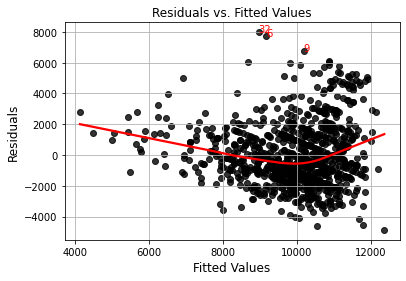

In [65]:
# Diagnostic plot for checking Heroscedasticity problem

sns.regplot(x = m1.fittedvalues,
            y = m1.resid,
            lowess = True,
            scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

# Top three observations with the greatest absolute value of the residual
top3 = abs(m1.resid).sort_values(ascending = False)[:3]
for i in top3.index:
    plt.annotate(i, xy = (m1.fittedvalues[i], m1.resid[i]), color = 'red')

> **result**: We see Heteroscedasticity problem in model (variance of residuals is not constant)

In [66]:
# Check Cook's distance
m1.get_influence().summary_frame().cooks_d  # extract Cook's distance of every observation

585     0.001826
876     0.000171
1123    0.000052
680     0.000470
689     0.000100
          ...   
1238    0.001446
1147    0.000317
106     0.001825
1041    0.000045
1122    0.000367
Name: cooks_d, Length: 927, dtype: float64

In [70]:
# if we have a observation with Cook's Distance > 1, that makes a problem
sum(m1.get_influence().summary_frame().cooks_d > 1)

0

> **result**: there is no Cook's Distance > 1

Our m1 model problems:
 1. has Heteroscedasticity problem
 2. Errors are not normally distributed
 
> So, this model has problem. and t-test results of it are not reliable yet!
 
## Model 2: Quadratic Regression (Multivariate Regression)

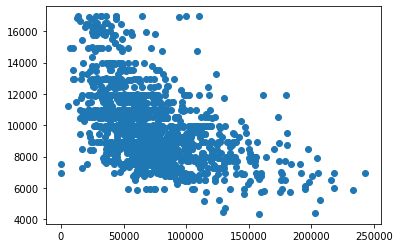

In [71]:
plt.scatter(x = data['KM'], y = data['Price'])

> it seems that the relationship between these two variables in this sample and this data-range isn't linear, it is non-linear relationship 

**Hypothesis**: there is a non-linear relationship between **Price** and **KM** -> fit a 2-degree curve to describe it

In [72]:
train['KM_2'] = train['KM'] ** 2  # create new variable
train.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_2
585,12250,60,96000,Diesel,72,False,False,2000,4,1100,9216000000
876,9950,61,44597,Petrol,86,False,False,1300,3,1015,1988892409
1123,8950,71,83047,Petrol,86,True,True,1300,3,1045,6896804209
680,7950,68,74889,Petrol,86,True,False,1300,3,1015,5608362321
689,8995,67,73936,Petrol,86,True,False,1300,5,1050,5466532096


In [73]:
# Define the feature set X
X = train[['KM', 'KM_2']]
X = sm.add_constant(X)  # adding a constant

# Define response variable
y = train['Price']

In [74]:
X.head()

,const,KM,KM_2
585,1.0,96000,9216000000
876,1.0,44597,1988892409
1123,1.0,83047,6896804209
680,1.0,74889,5608362321
689,1.0,73936,5466532096


In [75]:
# Regression model
m2 = sm.OLS(y, X).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     202.4
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.30e-73
Time:                        20:41:47   Log-Likelihood:                -8351.2
No. Observations:                 927   AIC:                         1.671e+04
Df Residuals:                     924   BIC:                         1.672e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.364e+04    254.903     53.530      0.000    1.31e+04    1.41e+04
KM            -0.0682      0.006    -11.544      0.000      -0.080      -0.057
KM_2        1.825e-07      3e-08      6.092      0.000    1.24e-07    2.41e-07
==============================================================================
Omnibus:                       82.652   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.358
Skew:                           0.720   Prob(JB):                     1.79e-24
Kurtosis:                       3.869   Cond. No.                     3.86e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check Assumptions of Regression

1. Normality of residuals (Errors)

<Axes: ylabel='Probability'>

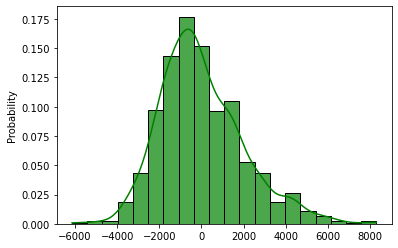

In [76]:
# Plot Histogram of residuals
sns.histplot(m2.resid, stat = 'probability',
             kde = True, alpha = 0.7, color = 'green',
             bins = 20)

# skewed to right

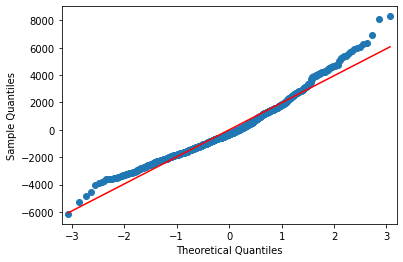

In [77]:
# QQ-plot
qqplot_m2 = sm.qqplot(m2.resid, line = 's')
plt.show()

In [78]:
# Jarque-Bera Test (Skewness = 0 ?)
  # H0: the data is normally distributed
  # p-value < 0.05 reject normality assumption

# Omnibus K-squared normality test
  # H0: the data is normally distributed
  # p-value < 0.05 reject normality assumption

print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     202.4
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.30e-73
Time:                        20:51:41   Log-Likelihood:                -8351.2
No. Observations:                 927   AIC:                         1.671e+04
Df Residuals:                     924   BIC:                         1.672e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.364e+04    254.903     53.530      0.0

> **result**: Residuals are not Normally Distributed -> reject first Assumption of Regression

2. Residuals independency

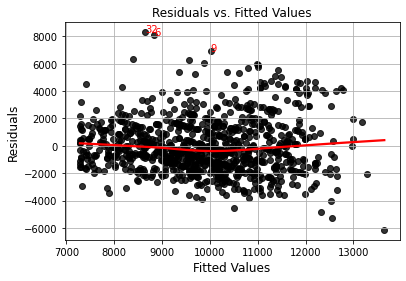

In [79]:
# Diagnostic plot
sns.regplot(x = m2.fittedvalues, y = m2.resid, lowess = True,
               scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

# Top three observations with the greatest absolute value of the residual
top3 = abs(m2.resid).sort_values(ascending = False)[:3]
for i in top3.index:
    plt.annotate(i, xy = (m2.fittedvalues[i], m2.resid[i]), color = 'red')

In [80]:
# Check Cook's distance
sum(m1.get_influence().summary_frame().cooks_d > 1)  # are any observation with Cook's Distance > 1

0

Linear Regression vs Quadratic Regression

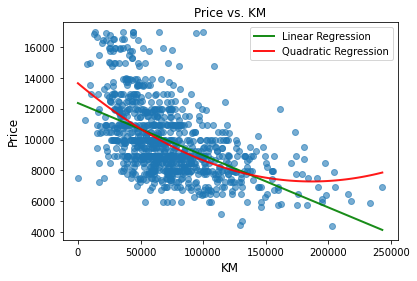

In [87]:
plt.scatter(x = train['KM'], y = train['Price'], alpha = 0.6)

# fit Linear (1-degree) Regression on data
params1 = np.polyfit(train['KM'], train['Price'], 1)  # fit 1-degree
xp = np.linspace(train['KM'].min(), train['KM'].max(), 100)  # generate 100 continuous number on X axis
yp1 = np.polyval(params1, xp)  # generate equivalent yp for xp
plt.plot(xp, yp1, alpha = 0.9, linewidth = 2, color = 'green', label = 'Linear Regression')

# fit Quadratic (2-degree) Regression on data
params2 = np.polyfit(train['KM'], train['Price'], 2)  # fit 2-degree
yp2 = np.polyval(params2, xp)  # generate equivalent yp for xp
plt.plot(xp, yp2, alpha = 0.9, linewidth = 2, color = 'red', label = 'Quadratic Regression')

plt.xlabel('KM', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.title('Price vs. KM', fontsize = 12)
plt.legend()

Check having Multicollinearity problem via VIF

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):  # X: features matrix
    vif = pd.DataFrame()
    vif['variables'] = X.columns  # column names
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [89]:
calc_vif(X)  # calculate VIF for each variable (if VIF > 10 then Multicollinearity problem is serious)

,variables,VIF
0,const,15.343233
1,KM,11.195780
2,KM_2,11.195780


> We have strong Multicollinearity here because we define KM_2 variable based on KM variable

In [90]:
# Scale variable -> solve Multicollinearity problem
train['KM_scaled'] = (train['KM'] - train['KM'].mean()) / train['KM'].std()
train['KM_scaled_2'] = train['KM_scaled'] ** 2
train.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_2,KM_scaled,KM_scaled_2
585,12250,60,96000,Diesel,72,False,False,2000,4,1100,9216000000,0.632421,0.399956
876,9950,61,44597,Petrol,86,False,False,1300,3,1015,1988892409,-0.760577,0.578478
1123,8950,71,83047,Petrol,86,True,True,1300,3,1045,6896804209,0.281401,0.079186
680,7950,68,74889,Petrol,86,True,False,1300,3,1015,5608362321,0.060322,0.003639
689,8995,67,73936,Petrol,86,True,False,1300,5,1050,5466532096,0.034496,0.001190


In [91]:
# Define the feature set X
X = train[['KM_scaled', 'KM_scaled_2']]
X = sm.add_constant(X)

# Define response variable
y = train['Price']

In [92]:
# Regression model
m2_2 = sm.OLS(y, X).fit()
m2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     202.4
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.30e-73
Time:                        21:30:20   Log-Likelihood:                -8351.2
No. Observations:                 927   AIC:                         1.671e+04
Df Residuals:                     924   BIC:                         1.672e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9656.0925     76.779    125.765      0.000    9505.411    9806.774
KM_scaled   -1536.3055     80.455    -19.095      0.000   -1694.202   -1378.409
KM_scaled_2   248.4959     40.790      6.092      0.000     168.445     328.547
==============================================================================
Omnibus:                       82.652   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.358
Skew:                           0.720   Prob(JB):                     1.79e-24
Kurtosis:                       3.869   Cond. No.                         3.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Probability'>

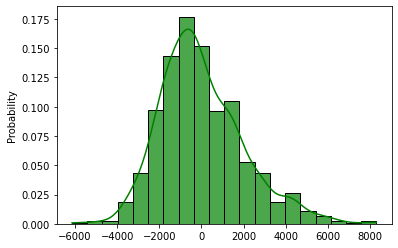

In [93]:
# Plot Histogram of residuals
sns.histplot(m2_2.resid, stat = 'probability',
             kde = True, alpha = 0.7, color = 'green',
             bins = 20)

In [94]:
calc_vif(X)

,variables,VIF
0,const,1.392041
1,KM_scaled,1.526893
2,KM_scaled_2,1.526893


## Model 3: Use All Variables

In [96]:
import statsmodels.formula.api as smf

# Regress 'Price' on all other predictor variables
m3 = smf.ols(
    formula = 'Price ~ KM_scaled + KM_scaled_2 + Age + C(FuelType) + HP + C(MetColor) + C(Automatic) + CC + C(Doors) + Weight',
    data = train).fit()

m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     263.7
Date:                Fri, 26 May 2023   Prob (F-statistic):          3.19e-298
Time:                        21:41:47   Log-Likelihood:                -7796.9
No. Observations:                 927   AIC:                         1.562e+04
Df Residuals:                     913   BIC:                         1.569e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2181.9203   1954.196      1.117      0.264   -1653.318    6017.159
C(FuelType)[T.Diesel] -1475.3241   1138.348     -1.296      0.195   -3709.407     758.759
C(FuelType)[T.Petrol]   879.5914    319.863      2.750      0.006     251.839    1507.344
C(MetColor)[T.True]     -94.4378     77.446     -1.219      0.223    -246.431      57.556
C(Automatic)[T.True]    299.9439    162.550      1.845      0.065     -19.070     618.958
C(Doors)[T.3]          -421.9525   1105.702     -0.382      0.703   -2591.965    1748.060
C(Doors)[T.4]          -349.2560   1109.940     -0.315      0.753   -2527.587    1829.075
C(Doors)[T.5]          -376.3689   1106.010     -0.340      0.734   -2546.986    1794.248
KM_scaled              -467.6609     56.087     -8.338      0.000    -577.734    -357.587
KM_scaled_2             -57.8620     24.635     -2.349      0.019    -106.209      -9.515
Age                    -111.9455      3.081    -36.337      0.000    -117.992    -105.899
HP                      -17.7352     17.045     -1.040      0.298     -51.188      15.718
CC                        1.9616      1.320      1.486      0.138      -0.629       4.552
Weight                   12.1913      1.536      7.937      0.000       9.177      15.206
==============================================================================
Omnibus:                       95.692   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.232
Skew:                          -0.437   Prob(JB):                     1.20e-77
Kurtosis:                       5.900   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Remove in-significant variables (consider the t-test results)

In [97]:
#Removing variables: MetColor
train.groupby(['MetColor'])['Price'].mean()  # calculate mean(Price) for each Category

MetColor
False     9655.696774
True     10029.236629
Name: Price, dtype: float64

<Axes: xlabel='MetColor', ylabel='Price'>

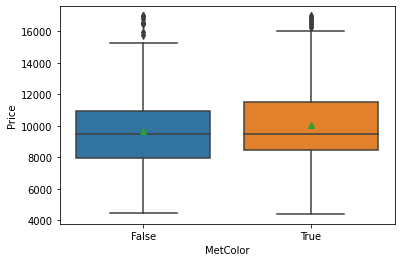

In [98]:
# Boxplot for Price vs. MetColor (Descriptive Analysis)
sns.boxplot(x = 'MetColor', y = 'Price', data = train, showmeans = True)

> **MetColor** is not useful predictor for **Price** (has not significant effect on it)

In [99]:
#Removing variables: Doors
train.groupby(['Doors'])['Price'].mean()  # calculate mean(Price) for each Category

Doors
2     7950.000000
3     9700.551163
4     9038.511364
5    10310.610294
Name: Price, dtype: float64

<Axes: xlabel='Doors', ylabel='Price'>

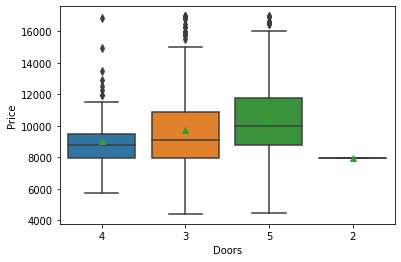

In [100]:
# Boxplot for Price vs. Doors (Descriptive Analysis)
sns.boxplot(x = 'Doors', y = 'Price', data = train, showmeans = True)

> **Doors** is not useful predictor for **Price** (has not significant effect on it)

In [101]:
#Removing variables: HP
train[['Price', 'HP']].corr()

,Price,HP
Price,1.000000,0.186886
HP,0.186886,1.000000


Text(0, 0.5, 'Price')

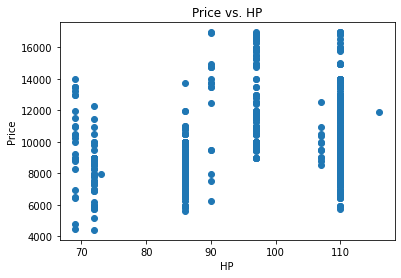

In [102]:
# Scatter plot for Price vs. HP
plt.scatter(x = train['HP'], y = train['Price'])
plt.title('Price vs. HP')
plt.xlabel('HP')
plt.ylabel('Price')

> **HP** is not useful predictor for **Price** (has not significant effect on it)

In [103]:
m3 = smf.ols(formula = 'Price ~ KM_scaled + KM_scaled_2 + Age + C(FuelType) + C(Automatic) + CC + Weight',
            data = train).fit()

m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     428.9
Date:                Fri, 26 May 2023   Prob (F-statistic):          6.61e-304
Time:                        21:55:30   Log-Likelihood:                -7798.6
No. Observations:                 927   AIC:                         1.562e+04
Df Residuals:                     918   BIC:                         1.566e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2000.1206   1379.085      1.450      0.147    -706.405    4706.646
C(FuelType)[T.Diesel]  -349.6629    344.755     -1.014      0.311   -1026.262     326.936
C(FuelType)[T.Petrol]   874.2120    317.505      2.753      0.006     251.092    1497.332
C(Automatic)[T.True]    322.1523    158.399      2.034      0.042      11.287     633.018
KM_scaled              -462.6837     55.865     -8.282      0.000    -572.321    -353.046
KM_scaled_2             -52.6333     24.311     -2.165      0.031    -100.346      -4.921
Age                    -110.8565      2.971    -37.308      0.000    -116.688    -105.025
CC                        0.6267      0.337      1.858      0.064      -0.035       1.289
Weight                   12.0448      1.329      9.063      0.000       9.436      14.653
==============================================================================
Omnibus:                       99.558   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.449
Skew:                          -0.449   Prob(JB):                     2.44e-83
Kurtosis:                       6.007   Cond. No.                     7.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check Assumptions of Regression

1. Normality of residuals

<Axes: ylabel='Probability'>

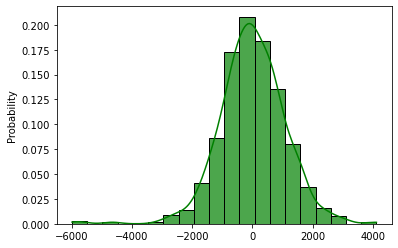

In [110]:
# Plot Histogram of residuals
sns.histplot(m3.resid, stat = 'probability',
             kde = True, alpha = 0.7, color = 'green',
             bins = 20)

# skewed to left

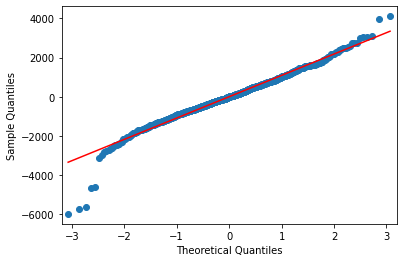

In [111]:
# QQ-plot
qqplot_m3 = sm.qqplot(m3.resid, line = 's')
plt.show()

## Model 4: Improved Multiple Regression
simplify **FuelType** variable to binary **IfPetrol** variable:

In [112]:
train.loc[train['FuelType'] == 'Petrol', 'IfPetrol'] = True
train.loc[train['FuelType'] != 'Petrol', 'IfPetrol'] = False
train.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_2,KM_scaled,KM_scaled_2,IfPetrol
585,12250,60,96000,Diesel,72,False,False,2000,4,1100,9216000000,0.632421,0.399956,False
876,9950,61,44597,Petrol,86,False,False,1300,3,1015,1988892409,-0.760577,0.578478,True
1123,8950,71,83047,Petrol,86,True,True,1300,3,1045,6896804209,0.281401,0.079186,True
680,7950,68,74889,Petrol,86,True,False,1300,3,1015,5608362321,0.060322,0.003639,True
689,8995,67,73936,Petrol,86,True,False,1300,5,1050,5466532096,0.034496,0.001190,True


In [113]:
# Regression model
m4 = smf.ols(formula = 'Price ~ KM_scaled + KM_scaled_2 + Age + C(IfPetrol) + C(Automatic) + CC + Weight',
            data = train).fit()

m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     490.0
Date:                Fri, 26 May 2023   Prob (F-statistic):          4.81e-305
Time:                        23:21:38   Log-Likelihood:                -7799.1
No. Observations:                 927   AIC:                         1.561e+04
Df Residuals:                     919   BIC:                         1.565e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1846.7908   1370.795      1.347      0.178    -843.462    4537.044
C(IfPetrol)[T.True]   1136.5972    184.076      6.175      0.000     775.340    1497.855
C(Automatic)[T.True]   326.0463    158.354      2.059      0.040      15.268     636.825
KM_scaled             -460.6101     55.828     -8.250      0.000    -570.176    -351.044
KM_scaled_2            -55.4812     24.149     -2.297      0.022    -102.875      -8.088
Age                   -110.9004      2.971    -37.326      0.000    -116.731    -105.069
CC                       0.5247      0.322      1.629      0.104      -0.107       1.157
Weight                  12.0913      1.328      9.103      0.000       9.484      14.698
==============================================================================
Omnibus:                      103.106   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.249
Skew:                          -0.458   Prob(JB):                     2.24e-89
Kurtosis:                       6.120   Cond. No.                     7.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check Assumptions of Regression

1. Normality of residuals

<Axes: ylabel='Probability'>

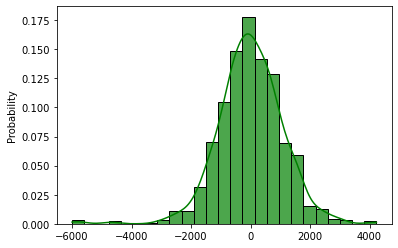

In [114]:
# Plot Histogram of residuals
sns.histplot(m4.resid, stat = 'probability',
            kde = True, alpha = 0.7, color = 'green',
            bins = 25)

# skewed to left

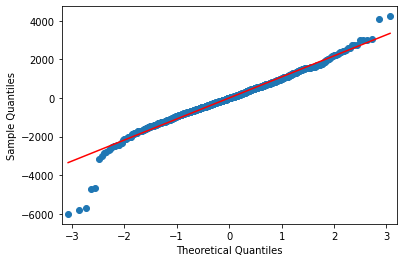

In [115]:
# QQ-plot
qqplot_m4 = sm.qqplot(m4.resid, line = 's')
plt.show()

In [116]:
# Jarque-Bera Test (Skewness = 0 ?)
  # H0: the data is normally distributed
  # p-value < 0.05 reject normality assumption

# Omnibus K-squared normality test
  # H0: the data is normally distributed
  # p-value < 0.05 reject normality assumption

print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     490.0
Date:                Fri, 26 May 2023   Prob (F-statistic):          4.81e-305
Time:                        23:24:23   Log-Likelihood:                -7799.1
No. Observations:                 927   AIC:                         1.561e+04
Df Residuals:                     919   BIC:                         1.565e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1846.7908 

Remove some few outliers

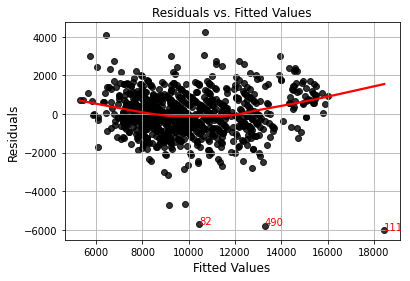

In [117]:
# Remove the outliers which have the most impact on the Regression line
sns.regplot(x = m4.fittedvalues, y = m4.resid, lowess = True,
               scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

# Top three observations with the greatest absolute value of residual
top3 = abs(m4.resid).sort_values(ascending = False)[:3]
for i in top3.index:
    plt.annotate(i, xy = (m4.fittedvalues[i], m4.resid[i]), color = 'red')

Observations with the greatest residual

In [118]:
m4.resid.sort_values(ascending = False)[:5]  # first 5 positive residuals (top 5)

113    4231.094633
947    4081.783349
446    3076.692507
585    3020.940932
943    3020.931072
dtype: float64

In [119]:
m4.resid.sort_values(ascending = True)[:5]  # first 5 negative residuals (bottom 5)

111   -6001.790387
490   -5778.033276
82    -5711.383601
283   -4716.949871
292   -4673.790394
dtype: float64

Remove Cases

In [125]:
# remove 10 observations with the greatest absolute Errors
train2 = train.drop(index = [82, 111, 113, 283, 292, 446, 490, 585, 943, 947])

In [126]:
train2.shape

(917, 14)

In [127]:
train[train.index == 490]  # see observation with index 490

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_2,KM_scaled,KM_scaled_2,IfPetrol
490,7500,50,1,Diesel,90,True,False,2000,3,1260,1,-1.969109,3.877392,False


In [128]:
# Regression model
m4_2 = smf.ols(formula = 'Price ~ KM_scaled + KM_scaled_2 + Age + C(IfPetrol) + C(Automatic) + CC + Weight',
              data = train2).fit()

m4_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     647.1
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        23:40:59   Log-Likelihood:                -7600.0
No. Observations:                 917   AIC:                         1.522e+04
Df Residuals:                     909   BIC:                         1.525e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8392.4088   1579.593     -5.313      0.000   -1.15e+04   -5292.335
C(IfPetrol)[T.True]   1340.9144    168.974      7.936      0.000    1009.291    1672.538
C(Automatic)[T.True]    88.7625    141.760      0.626      0.531    -189.452     366.977
KM_scaled             -479.3000     50.087     -9.569      0.000    -577.600    -381.000
KM_scaled_2            -57.4587     21.638     -2.655      0.008     -99.925     -14.993
Age                   -104.7078      2.719    -38.507      0.000    -110.044     -99.371
CC                      -0.6610      0.309     -2.137      0.033      -1.268      -0.054
Weight                  22.9613      1.584     14.492      0.000      19.852      26.071
==============================================================================
Omnibus:                        2.983   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                3.168
Skew:                          -0.048   Prob(JB):                        0.205
Kurtosis:                       3.272   Cond. No.                     9.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Adj. R-squared improved: 83%
* **Automatic** is not significant
* Prob(JB) and Prob(Omnibus) are > 0.05 -> residuals are Normally distributed

Check Assumptions of Regression
1. Normality of residuals

<Axes: ylabel='Probability'>

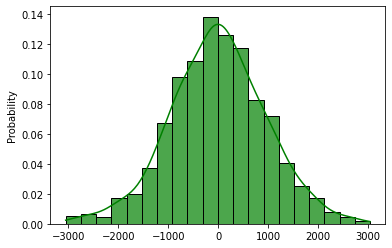

In [129]:
# Plot Histogram of residuals
sns.histplot(m4_2.resid, stat = 'probability',
            kde = True, alpha = 0.7, color = 'green',
            bins = 20)

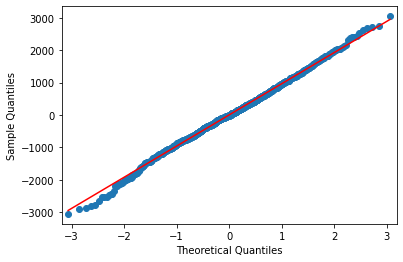

In [130]:
# QQ-plot
qqplot_m4_2 = sm.qqplot(m4_2.resid, line = 's')
plt.show()

In [131]:
# Jarque-Bera Test (Skewness = 0 ?)
  # H0: the data is normally distributed
  # p-value < 0.05 reject normality assumption

# Omnibus K-squared normality test
  # H0: the data is normally distributed
  # p-value < 0.05 reject normality assumption

print(m4_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     647.1
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        23:45:05   Log-Likelihood:                -7600.0
No. Observations:                 917   AIC:                         1.522e+04
Df Residuals:                     909   BIC:                         1.525e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8392.4088 

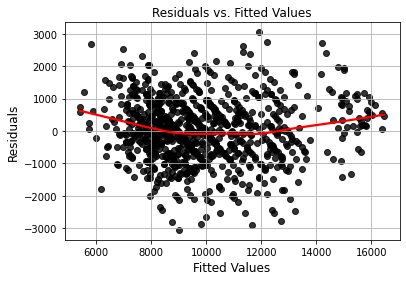

In [132]:
sns.regplot(x = m4_2.fittedvalues, y = m4_2.resid, lowess = True,
               scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

> Variance of residuals is almost constant

Check Cook's Distance

In [133]:
sum(m4_2.get_influence().summary_frame().cooks_d > 1)

0

> Regression Assumptions are confirmed -> we can consider to results of t-test

> **Automatic** is not significant (based on t-test)

In [134]:
# Final Regression model: remove 'Automatic' variable
m4_2 = smf.ols(formula = 'Price ~ KM_scaled + KM_scaled_2 + Age + C(IfPetrol) + CC + Weight',
              data = train2).fit()

m4_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     755.4
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        23:50:28   Log-Likelihood:                -7600.2
No. Observations:                 917   AIC:                         1.521e+04
Df Residuals:                     910   BIC:                         1.525e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8618.5593   1537.233     -5.607      0.000   -1.16e+04   -5601.625
C(IfPetrol)[T.True]  1344.7077    168.809      7.966      0.000    1013.408    1676.007
KM_scaled            -483.5758     49.603     -9.749      0.000    -580.925    -386.227
KM_scaled_2           -56.5190     21.578     -2.619      0.009     -98.868     -14.170
Age                  -104.3504      2.658    -39.264      0.000    -109.566     -99.135
CC                     -0.6936      0.305     -2.276      0.023      -1.292      -0.095
Weight                 23.2024      1.536     15.102      0.000      20.187      26.218
==============================================================================
Omnibus:                        2.945   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                3.114
Skew:                          -0.048   Prob(JB):                        0.211
Kurtosis:                       3.269   Cond. No.                     9.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
(train.shape[0] - train2.shape[0]) / train.shape[0] * 100

1.0787486515641855

> Number of removed observations from train is less than 2%

# Model Evaluation
Test the Model

In [136]:
m4_2.params  # Coefficients of the model (Regression Coefficients)

Intercept             -8618.559294
C(IfPetrol)[T.True]    1344.707695
KM_scaled              -483.575817
KM_scaled_2             -56.518991
Age                    -104.350380
CC                       -0.693640
Weight                   23.202442
dtype: float64

In [137]:
m4_2.conf_int(alpha = 0.05)  # Confidence Intervals for model parameters

,0,1
Intercept,-11635.493510,-5601.625078
C(IfPetrol)[T.True],1013.408383,1676.007007
KM_scaled,-580.925035,-386.226598
KM_scaled_2,-98.868326,-14.169657
Age,-109.566253,-99.134506
CC,-1.291805,-0.095475
Weight,20.187120,26.217764


Data Preparation (test data)

In [139]:
test['KM_scaled'] = (test['KM'] - test['KM'].mean()) / test['KM'].std()
test['KM_scaled_2'] = test['KM_scaled'] ** 2
test.loc[test['FuelType'] == 'Petrol', 'IfPetrol'] = True
test.loc[test['FuelType'] != 'Petrol', 'IfPetrol'] = False
test.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_scaled,KM_scaled_2,IfPetrol
1032,8950,75,102005,Petrol,107,True,True,1600,5,1105,0.886314,0.785552,True
260,10250,39,18500,Petrol,110,False,False,1600,4,1030,-1.546510,2.391693,True
758,10450,61,63000,Petrol,86,False,True,1300,3,1050,-0.250053,0.062526,True
1313,7750,73,34717,Petrol,86,False,False,1300,3,1015,-1.074046,1.153575,True
739,8100,68,65400,Petrol,86,True,False,1300,4,1000,-0.180132,0.032447,True


Prediction on test

In [140]:
test_pred = m4_2.predict(test)
test_pred  # prediction of 'Price' for each observation

1032     8955.746069
260     12057.853894
758      9938.993175
1313     8211.501399
739      8016.306198
            ...     
738     10370.688183
104     13603.484504
1047     9524.193832
523      9314.434772
1199     8455.689058
Length: 398, dtype: float64

Actual vs. Prediction

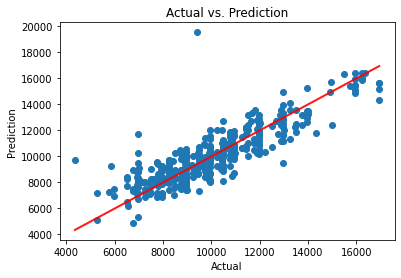

In [141]:
plt.scatter(x = test['Price'], y = test_pred)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# add 45' line
xp = np.linspace(test['Price'].min(), test['Price'].max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

Absolute Error mean, median, sd, max, min

In [142]:
abs_error = abs(test['Price'] - test_pred)
abs_error.describe()

count      398.000000
mean       861.403610
std        835.352934
min          0.313401
25%        313.785573
50%        718.251227
75%       1219.720766
max      10158.911104
dtype: float64

(array([272., 108.,  12.,   3.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([3.13401105e-01, 1.01617317e+03, 2.03203294e+03, 3.04789271e+03,
        4.06375248e+03, 5.07961225e+03, 6.09547202e+03, 7.11133179e+03,
        8.12719156e+03, 9.14305133e+03, 1.01589111e+04]),
 <BarContainer object of 10 artists>)

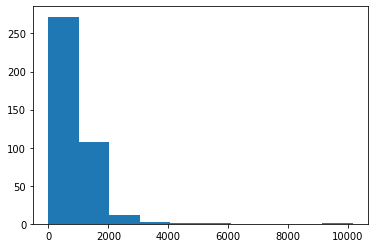

In [145]:
plt.hist(abs_error)

<Axes: >

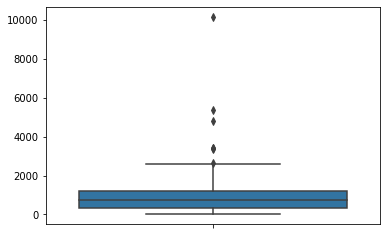

In [146]:
sns.boxplot(y = abs_error)

Absolute Error Percentage median, sd, mean, max, min

In [147]:
e_percent = round(abs(test['Price'] - test_pred) / test['Price'] * 100, 2)
e_percent.describe()

count    398.000000
mean       9.297312
std       11.043552
min        0.000000
25%        3.192500
50%        6.920000
75%       12.597500
max      123.290000
dtype: float64

> **75%** of predictions have less than **12.59%** Absolute Error

In [148]:
sum(e_percent <= 15) / len(e_percent) * 100

83.91959798994975

> **84%** of our predictions have less than **15%** Absolute Error